In [1]:
import numpy as np
from  tqdm.notebook import tqdm as tqdm_notebook
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import json

In [2]:
sns.set_style("whitegrid")

In [3]:
ALEXA = '/export/sec02/nabeel/MALINFO/alexa_url_map.csv'
VT    = '/export/sec02/nabeel/Vaccine_Disinfo/data/oct2021/unique.txt.vt.json'

### Alexa Data

In [4]:
alexa = pd.read_csv(ALEXA)

In [5]:
alexa

,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,0,youtu.be,False,-1.00,https://youtu.be/CP8jtrA6EpI
1,1,medalerts.org,False,-1.00,http://www.medalerts.org/vaersdb/findfield.php...
2,2,medalerts.org,False,-1.00,http://www.medalerts.org/vaersdb/findfield.php...
3,3,medalerts.org,False,-1.00,http://www.medalerts.org/vaersdb/findfield.php...
4,4,fox6now.com,False,-1.00,https://www.fox6now.com/news/senator-johnson-f...
...,...,...,...,...,...
16482,16482,dimpenews.com,True,218499.67,https://dimpenews.com/2021/05/08/vaers-27%cf%8...
16483,16483,dimpenews.com,True,218499.67,http://dimpenews.com
16484,16484,newsorbit.com,True,229489.97,https://newsorbit.com/news/corona-vaccine-is-s...
16485,16485,zums.ac.ir,True,243115.97,https://zums.ac.ir//journal/article-1-6197-en....


In [6]:
print('Number of unique Urls {}'.format(alexa.url.unique().shape[0]))
print('Number of unique FQDNS/APEX {}'.format(alexa.domain.unique().shape[0]))

Number of unique Urls 16487
Number of unique FQDNS/APEX 2885


#### Alexa unranked domain/urls

In [7]:
unrank = alexa.loc[alexa.is_apex_in_alexa==False].reset_index(drop=True)
print('Number of unique unranked Urls {}'.format(unrank.url.unique().shape[0]))
print('Number of unique unranked FQDNS/APEX {}'.format(unrank.domain.unique().shape[0]))
display(unrank)

Number of unique unranked Urls 7591
Number of unique unranked FQDNS/APEX 2096


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,0,youtu.be,False,-1.0,https://youtu.be/CP8jtrA6EpI
1,1,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
2,2,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
3,3,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
4,4,fox6now.com,False,-1.0,https://www.fox6now.com/news/senator-johnson-f...
...,...,...,...,...,...
7586,7586,thewashingtonstandard.com,False,-1.0,https://thewashingtonstandard.com/3005-deaths-...
7587,7587,thewashingtonstandard.com,False,-1.0,https://thewashingtonstandard.com/cdc-vaers-de...
7588,7588,thevaccinereaction.org,False,-1.0,https://thevaccinereaction.org/2021/03/healthy...
7589,7589,swprs.org,False,-1.0,https://swprs.org/covid-vaccines-deaths/


#### Alexa ranked domain/urls

In [8]:
rank = alexa.loc[alexa.is_apex_in_alexa==True].reset_index(drop=True)
print('Number of unique ranked Urls {}'.format(rank.url.unique().shape[0]))
print('Number of unique ranked FQDNS/APEX {}'.format(rank.domain.unique().shape[0]))
display(rank)

Number of unique ranked Urls 8896
Number of unique ranked FQDNS/APEX 789


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,7591,google.com,True,1.00,https://drive.google.com/drive/folders/1lBiMax...
1,7592,google.com,True,1.00,https://drive.google.com/file/d/1FCLpbPgBu1Kb-...
2,7593,google.com,True,1.00,https://www.google.com/amp/s/www.kcra.com/amp/...
3,7594,google.com,True,1.00,https://www.google.com/url?sa=t&source=web&cd=...
4,7595,google.com,True,1.00,https://www.google.com/search?q=VAERS&rlz=1C1C...
...,...,...,...,...,...
8891,16482,dimpenews.com,True,218499.67,https://dimpenews.com/2021/05/08/vaers-27%cf%8...
8892,16483,dimpenews.com,True,218499.67,http://dimpenews.com
8893,16484,newsorbit.com,True,229489.97,https://newsorbit.com/news/corona-vaccine-is-s...
8894,16485,zums.ac.ir,True,243115.97,https://zums.ac.ir//journal/article-1-6197-en....


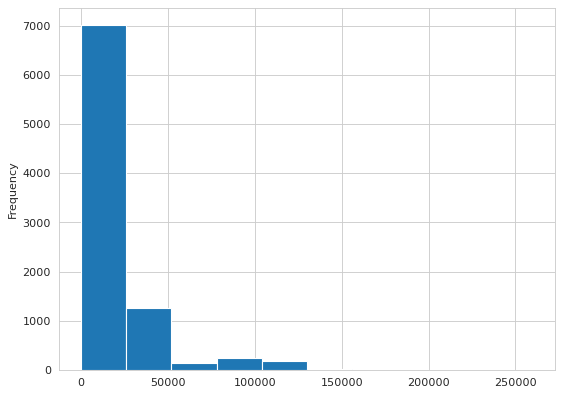

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
rank['rank'].plot(kind = 'hist')
plt.show()

<b>Minium Alexa rank of the data set (High reputed)</b>

In [10]:
rank.loc[rank['rank']==min(rank['rank'])][['domain', 'is_apex_in_alexa', 'rank', 'url']]

,domain,is_apex_in_alexa,rank,url
0,google.com,True,1.0,https://drive.google.com/drive/folders/1lBiMax...
1,google.com,True,1.0,https://drive.google.com/file/d/1FCLpbPgBu1Kb-...
2,google.com,True,1.0,https://www.google.com/amp/s/www.kcra.com/amp/...
3,google.com,True,1.0,https://www.google.com/url?sa=t&source=web&cd=...
4,google.com,True,1.0,https://www.google.com/search?q=VAERS&rlz=1C1C...
...,...,...,...,...
259,google.com,True,1.0,https://drive.google.com/file/d/1MeE7Mz9H9Jice...
260,google.com,True,1.0,https://www.google.com/amp/s/www.forbes.com/si...
261,google.com,True,1.0,https://www.google.com/amp/s/www.forbes.com/si...
262,google.com,True,1.0,https://www.google.com/amp/s/www.forbes.com/si...


<b>Maximum Alexa rank of the data set (Low reputed)</b>

In [11]:
rank.loc[rank['rank'].idxmax()][['domain', 'is_apex_in_alexa', 'rank', 'url']]

domain                                                          s.com
is_apex_in_alexa                                                 True
rank                                                        259666.16
url                 http://s.com/2021-04-30-baby-dies-pfizer-covid...
Name: 8895, dtype: object

In [12]:
#GROUND TRUTH LOAD

PUBLIC = '/bad_ip_data/ucsc/Compromised_Domains/csvs and meta data/public_apex_domains'
public_domains = list(map(lambda x:x.split('\n')[0],open(PUBLIC, 'r').readlines()))
public_domains[:5]

['0000000000000000000000.com',
 '0000.tk',
 '000webhostapp.com',
 '000webhost.com',
 '000webhosting.ga']

#### filter out public and non public alexa/fqdns from alexa ranked dataset 

In [13]:
PUBLIC = []
PRIVATE = []

for index, row in tqdm_notebook(rank.iterrows()):
    if row.domain in public_domains:
        PUBLIC.append(row)
    else:
        PRIVATE.append(row)

PUBLIC  = pd.DataFrame(PUBLIC).reset_index(drop=True)
PRIVATE = pd.DataFrame(PRIVATE).reset_index(drop=True)

0it [00:00, ?it/s]

In [14]:
print('Number of uniqued alexa ranked public apex/fqdns : {}'.format(PUBLIC.domain.unique().shape[0]))
print('Number of uniqued alexa ranked public URls : {}'.format(PUBLIC.url.unique().shape[0]))
display(PUBLIC)

Number of uniqued alexa ranked public apex/fqdns : 7
Number of uniqued alexa ranked public URls : 363


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,8137,facebook.com,True,7.354839,https://www.facebook.com/marcellaterry/posts/1...
1,8138,facebook.com,True,7.354839,https://m.facebook.com/story.php?story_fbid=51...
2,8139,facebook.com,True,7.354839,https://www.facebook.com/morgancjonas/videos/1...
3,8140,facebook.com,True,7.354839,https://www.facebook.com/lindsayfoord/videos/1...
4,8141,facebook.com,True,7.354839,https://m.facebook.com/watch/?v=458659582007540
...,...,...,...,...,...
358,10006,wixsite.com,True,368.806460,https://goodcitizen2021.wixsite.com/website/tr...
359,10007,wixsite.com,True,368.806460,https://kasialovesgod.wixsite.com/newsletter/p...
360,10008,wixsite.com,True,368.806460,https://goodcitizen2021.wixsite.com/website/co...
361,14126,netdna-ssl.com,True,9324.419000,https://30g7el1b4b1n28kgpr414nuu-wpengine.netd...


In [15]:
for i in PUBLIC.domain.unique():
    print(i)

facebook.com
wordpress.com
tumblr.com
twimg.com
wixsite.com
netdna-ssl.com
b-cdn.net


In [16]:
print('Number of uniqued alexa ranked private apex/fqdns : {}'.format(PRIVATE.domain.unique().shape[0]))
print('Number of uniqued alexa ranked private URls : {}'.format(PRIVATE.url.unique().shape[0]))
display(PRIVATE)

Number of uniqued alexa ranked private apex/fqdns : 782
Number of uniqued alexa ranked private URls : 8533


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,7591,google.com,True,1.00,https://drive.google.com/drive/folders/1lBiMax...
1,7592,google.com,True,1.00,https://drive.google.com/file/d/1FCLpbPgBu1Kb-...
2,7593,google.com,True,1.00,https://www.google.com/amp/s/www.kcra.com/amp/...
3,7594,google.com,True,1.00,https://www.google.com/url?sa=t&source=web&cd=...
4,7595,google.com,True,1.00,https://www.google.com/search?q=VAERS&rlz=1C1C...
...,...,...,...,...,...
8528,16482,dimpenews.com,True,218499.67,https://dimpenews.com/2021/05/08/vaers-27%cf%8...
8529,16483,dimpenews.com,True,218499.67,http://dimpenews.com
8530,16484,newsorbit.com,True,229489.97,https://newsorbit.com/news/corona-vaccine-is-s...
8531,16485,zums.ac.ir,True,243115.97,https://zums.ac.ir//journal/article-1-6197-en....


<b> Most frequent alexa ranked public apex/fqdn </b>

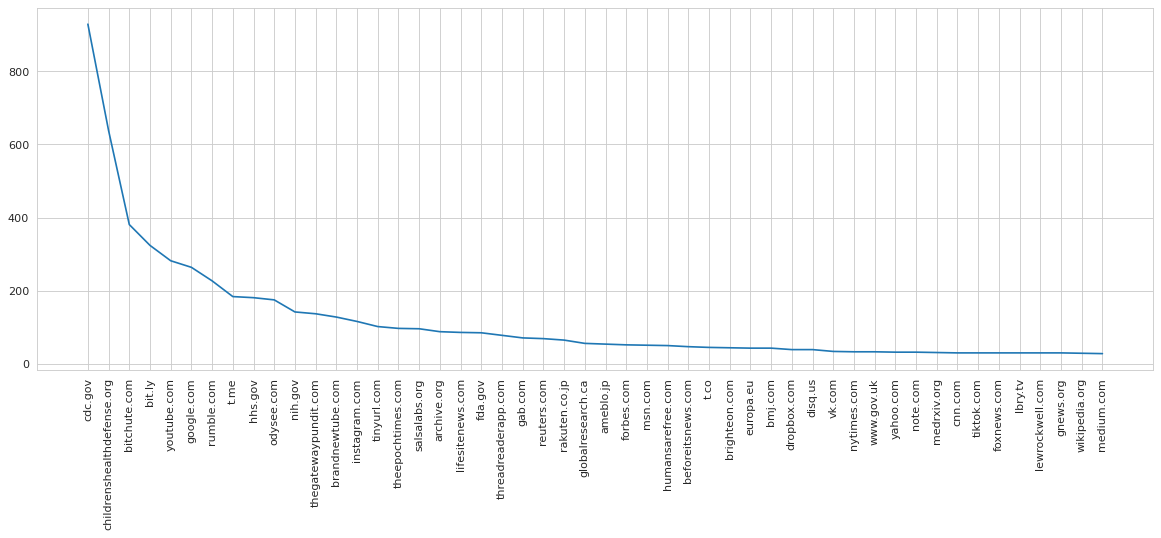

In [17]:
cat_log = sorted(Counter(PRIVATE.domain).items(), key = lambda itm: itm[1], reverse = True)[:50]
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(list(map(lambda x:x[0], cat_log)),list(map(lambda x:x[1], cat_log)))
plt.xticks(rotation=90)
plt.show()

#### filter out public and non public alexa/fqdns from alexa ranked dataset

In [18]:
PUBLIC_UN = []
PRIVATE_UN = []

for index, row in tqdm_notebook(unrank.iterrows()):
    if row.domain in public_domains:
        PUBLIC_UN.append(row)
    else:
        PRIVATE_UN.append(row)

PUBLIC_UN  = pd.DataFrame(PUBLIC_UN).reset_index(drop=True)
PRIVATE_UN = pd.DataFrame(PRIVATE_UN).reset_index(drop=True)

0it [00:00, ?it/s]

In [19]:
print('Number of uniqued alexa unranked public apex/fqdns : {}'.format(PUBLIC_UN.domain.unique().shape[0]))
print('Number of uniqued alexa unranked public URls : {}'.format(PUBLIC_UN.url.unique().shape[0]))
display(PUBLIC_UN)

Number of uniqued alexa unranked public apex/fqdns : 5
Number of uniqued alexa unranked public URls : 130


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,194,blogspot.com,False,-1.0,http://alfredodecclesia.blogspot.com/2021/06/c...
1,302,blogspot.com,False,-1.0,https://2politicaljunkies.blogspot.com/2021/05...
2,309,blogspot.com,False,-1.0,https://antioph.blogspot.com/2021/01/93-covid-...
3,317,blogspot.com,False,-1.0,https://anexsartitos.blogspot.com/2021/07/tren...
4,341,blogspot.com,False,-1.0,https://alexposoukh.blogspot.com/2021/05/vacci...
...,...,...,...,...,...
125,7370,blogspot.com,False,-1.0,https://ppldailylife.blogspot.com/2021/04/fron...
126,7382,blogspot.com,False,-1.0,https://stratagemsoftheright.blogspot.com/2021...
127,7396,blogspot.com,False,-1.0,https://mandataapoekso.blogspot.com/2021/03/va...
128,7404,blogspot.com,False,-1.0,https://mandataapoekso.blogspot.com/2021/01/93...


In [20]:
for i in PUBLIC_UN.domain.unique():
    print(i)

blogspot.com
fbcdn.net
googleusercontent.com
github.io
dyndns.org


In [21]:
print('Number of uniqued alexa unranked private apex/fqdns : {}'.format(PRIVATE_UN.domain.unique().shape[0]))
print('Number of uniqued alexa unranked private  URls : {}'.format(PRIVATE_UN.url.unique().shape[0]))
display(PRIVATE_UN)

Number of uniqued alexa unranked private apex/fqdns : 2091
Number of uniqued alexa unranked private  URls : 7461


,Unnamed: 0,domain,is_apex_in_alexa,rank,url
0,0,youtu.be,False,-1.0,https://youtu.be/CP8jtrA6EpI
1,1,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
2,2,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
3,3,medalerts.org,False,-1.0,http://www.medalerts.org/vaersdb/findfield.php...
4,4,fox6now.com,False,-1.0,https://www.fox6now.com/news/senator-johnson-f...
...,...,...,...,...,...
7456,7586,thewashingtonstandard.com,False,-1.0,https://thewashingtonstandard.com/3005-deaths-...
7457,7587,thewashingtonstandard.com,False,-1.0,https://thewashingtonstandard.com/cdc-vaers-de...
7458,7588,thevaccinereaction.org,False,-1.0,https://thevaccinereaction.org/2021/03/healthy...
7459,7589,swprs.org,False,-1.0,https://swprs.org/covid-vaccines-deaths/


<b> Most frequent alexa ranked public apex/fqdn </b>

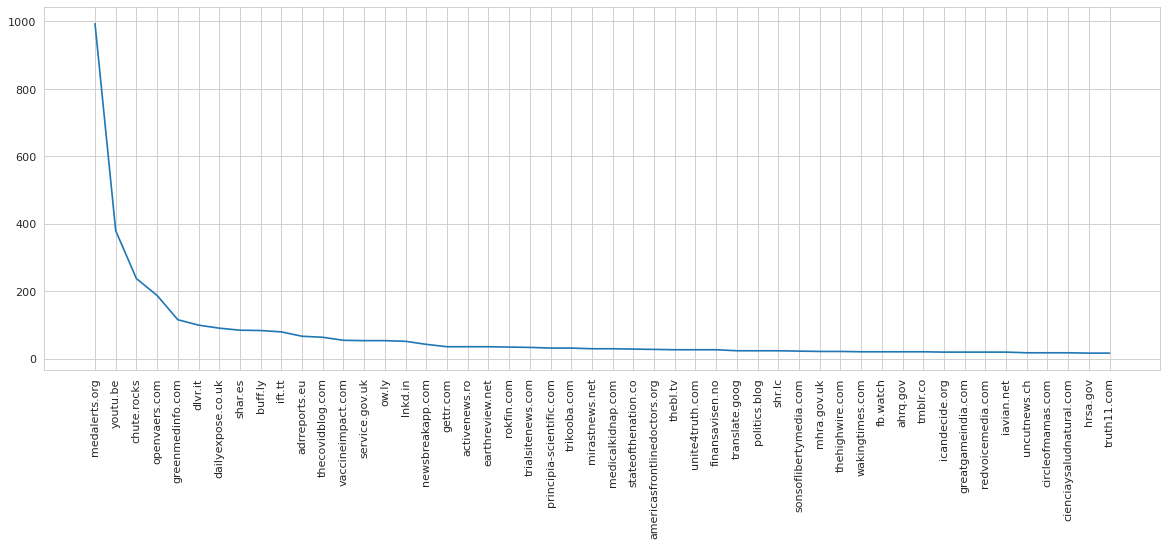

In [22]:
cat_log_un = sorted(Counter(PRIVATE_UN.domain).items(), key = lambda itm: itm[1], reverse = True)[:50]
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(list(map(lambda x:x[0], cat_log_un)),list(map(lambda x:x[1], cat_log_un)))
plt.xticks(rotation=90)
plt.show()

### VT

In [23]:
# null = None
# true = True
# false = False

# VTSCAN = []
# for record in tqdm_notebook(open(VT,'r').readlines()):
#     VTSCAN.append(eval(record))

In [24]:
# VTSCANDF = []
# for i in tqdm_notebook(VTSCAN):
#     VTSCANDF.append({
#         'scan_id':i.get('scan_id'),
#         'url':i.get('url'),
#         'positives':i.get('positives')
#     })
# VTSCANDF = pd.DataFrame(VTSCANDF)
# VTSCANDF.to_csv('temp.csv')

VTSCANDF = pd.read_csv('temp.csv')

In [25]:
print("Number of VT responses : {}".format(VTSCANDF.shape[0]))
print("Missing VT responses : {}".format(alexa.shape[0] - VTSCANDF.shape[0]))
VTSCANDF

Number of VT responses : 16448
Missing VT responses : 39


,Unnamed: 0,scan_id,url,positives
0,0,402ce390826557214017c26fe81bcc1a8f4a2668c6b76d...,https://wonder.cdc.gov/vaers.html,0.0
1,1,e6fb27439ba5c9bdf7246b7c185ee1497d2c2785e75b40...,https://www.openvaers.com/covid-data,0.0
2,2,4c12482d16f1c44282f7b4772655afa5ec928d1fd1889d...,https://childrenshealthdefense.org/defender/va...,0.0
3,3,8067ef81705c2880f9f1593742f0678903fe9b595857ad...,https://vaers.hhs.gov/,0.0
4,4,5594f2c7594e4db92d6eb8305714f49294dc09ee8e720e...,https://childrenshealthdefense.org/defender/cd...,0.0
...,...,...,...,...
16443,16443,472737c203e17acd3e86a9001d4c08f827585c1e10c1e4...,https://medalerts.org/vaersdb/findfield.php?EV...,0.0
16444,16444,ec8bec963a6f4c21c8b783830f8671be6b3d44b62ce38b...,https://medalerts.org/vaersdb/findfield.php?EV...,0.0
16445,16445,d3bed42d2468c22f10632aa346f7c17ee11b2426183dff...,https://medalerts.org/vaersdb/findfield.php?EV...,0.0
16446,16446,d6f34b468b180f53eaac301875931667e52bfe0be0f61c...,https://medalerts.org/vaersdb/findfield.php?EV...,0.0


<b> VT with alexa ranked private </b>

In [26]:
vt_with_alexa_ranked_private = []
MISSING = []
for index, row in tqdm_notebook(PRIVATE.iterrows()):
    try:
        temp = VTSCANDF.loc[VTSCANDF.url==row.url]
        positives = temp.positives.values[0]
        scan_id =  temp.scan_id.values[0]
        row = row.append(pd.Series({'positives':positives}))
        row = row.append(pd.Series({'scan_id ':scan_id}))
        vt_with_alexa_ranked_private.append(row)
    except:
        MISSING.append(row.url)
print(len(MISSING))
vt_with_alexa_ranked_private = pd.DataFrame(vt_with_alexa_ranked_private)

0it [00:00, ?it/s]

532


In [27]:
vt_with_alexa_ranked_private

,Unnamed: 0,domain,is_apex_in_alexa,rank,url,positives,scan_id
0,7591,google.com,True,1.00,https://drive.google.com/drive/folders/1lBiMax...,0.0,1e16c0322b0b495b9e15ea9a2547457f7ea889601fed4b...
1,7592,google.com,True,1.00,https://drive.google.com/file/d/1FCLpbPgBu1Kb-...,0.0,6e695fa545ee1002ce3f65ec26e2865fa72c15a31024a5...
2,7593,google.com,True,1.00,https://www.google.com/amp/s/www.kcra.com/amp/...,1.0,102a8e3bcf182bdcc12b69fe087313ac1bab1b6e356da8...
3,7595,google.com,True,1.00,https://www.google.com/search?q=VAERS&rlz=1C1C...,1.0,0e10f02af40171010c3f2ab80ea9dbfbe570a194ae9b63...
4,7596,google.com,True,1.00,https://www.google.com/search?q=Fawkes+News&rl...,1.0,db4f74a8572e3eee64cdcdc926635c90b80c096328a771...
...,...,...,...,...,...,...,...
7996,16476,catbox.moe,True,187512.33,https://files.catbox.moe/cc56f0.mp4,1.0,fef8a96df6486515e6c673e7833aeb7a728e4156ceb6f0...
7997,16477,shiftfrequency.com,True,215205.52,https://www.shiftfrequency.com/delta-biden-vae...,0.0,e3f403dd78006f306f0911c52b461204d052c69e131524...
7998,16478,shiftfrequency.com,True,215205.52,https://www.shiftfrequency.com/lawsuit-charges...,0.0,3c548d0f7a93805f74857b5873dc1ef79eb981b327ba9e...
7999,16484,newsorbit.com,True,229489.97,https://newsorbit.com/news/corona-vaccine-is-s...,0.0,74e7fd1a70cbc10e3a99dca9b3065ca5f349486fde4e08...


[(0.0, 6678), (1.0, 998), (2.0, 320), (3.0, 4), (4.0, 1)]


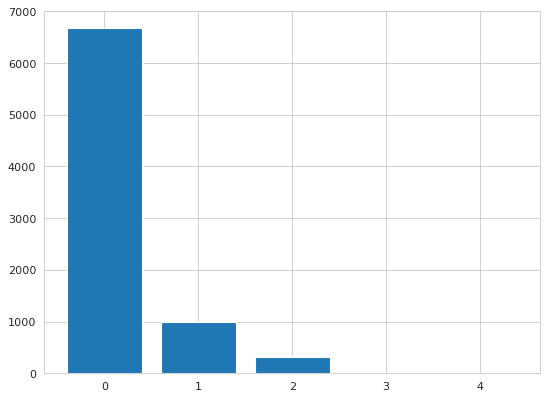

In [28]:
catlog = sorted(Counter(vt_with_alexa_ranked_private.positives.values).items(),
                key = lambda itm: itm[0], reverse = False)[:50]
print(catlog)
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(list(map(lambda x:x[0], catlog)),list(map(lambda x:x[1], catlog)))
plt.show()

<b> VT with alexa unranked private </b>

In [29]:
vt_with_alexa_ranked_private_un = []
MISSING_UN = []
for index, row in tqdm_notebook(PRIVATE_UN.iterrows()):
    try:
        temp = VTSCANDF.loc[VTSCANDF.url==row.url]
        positives = temp.positives.values[0]
        scan_id =  temp.scan_id.values[0]
        row = row.append(pd.Series({'positives':positives}))
        row = row.append(pd.Series({'scan_id ':scan_id}))
        vt_with_alexa_ranked_private_un.append(row)
    except:
        MISSING_UN.append(row.url)
print(len(MISSING_UN))
vt_with_alexa_ranked_private_un = pd.DataFrame(vt_with_alexa_ranked_private_un)

0it [00:00, ?it/s]

1158


[(0.0, 5814), (1.0, 153), (2.0, 223), (3.0, 8), (4.0, 8), (5.0, 97)]


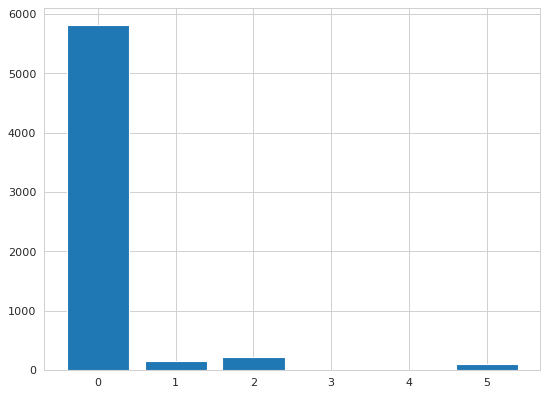

In [30]:
catlog_un = sorted(Counter(vt_with_alexa_ranked_private_un.positives.values).items(),
                   key = lambda itm: itm[0], reverse = False)[:50]
print(catlog_un)
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(list(map(lambda x:x[0], catlog_un)),list(map(lambda x:x[1], catlog_un)))
plt.show()